# 송파구 따릉이 스테이션별 예측 분석
> 서울시 공공데이터 이용
- 서울시 공공자전거 대여소 정보
- 서울시 공공자전거 
- 서울 날씨 데이터

## 송파구의 따릉이 스테이션 거치구획수 추출
- 서울시 공공자전거 대여소 정보 이용

In [98]:
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform
import matplotlib.pyplot as plt

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [99]:
import pandas as pd 
public_bike_stations = pd.read_csv('../../data/공공자전거 대여소 정보.csv')
public_bike_stations

,대여소\n번호,보관소(대여소)명,자치구,상세주소,위도,경도,설치\n시기,거치대수(LCD),거치대수(QR),운영\n방식
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.575794,126.971451,2015-10-07,20.0,20.0,QR
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤,37.575947,126.974060,2015-10-07,12.0,12.0,QR
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189 세종로공원,37.571770,126.974663,2015-10-07,8.0,8.0,QR
3,305,종로구청 옆,종로구,서울특별시 종로구 세종로 84-1,37.572559,126.978333,2015-01-07,16.0,16.0,QR
4,307,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55 서울역사박물관 앞,37.570000,126.971100,2015-10-07,11.0,11.0,QR
...,...,...,...,...,...,...,...,...,...,...
2758,5872,서경팰리스 앞,영등포구,영등포구 가마산로 468,37.505764,126.908661,2024-03-18,NaN,7.0,QR
2759,6057,을지로5가(방산시장),중구,중구 동호로 369,37.567398,127.002014,2024-04-11,NaN,6.0,QR
2760,6058,서울도시건축전시관 옆,중구,중구 세종대로 101,37.566540,126.976845,2024-04-26,NaN,10.0,QR
2761,6059,덕수중학교,중구,중구 인현동2가 240-2,37.564392,126.997299,2024-06-03,NaN,8.0,QR


### 송파구 대여소 추출

In [100]:
sp_station = public_bike_stations[public_bike_stations['자치구'] == '송파구']
sp_station

,대여소\n번호,보관소(대여소)명,자치구,상세주소,위도,경도,설치\n시기,거치대수(LCD),거치대수(QR),운영\n방식
2407,1201,가락시장역 3번 출구,송파구,서울특별시 송파구 송파대로 지하 257,37.493179,127.118546,2017-06-22,15.0,NaN,LCD
2408,1203,밀리아나2빌딩 앞,송파구,서울특별시 송파구 송파대로28길 24,37.493729,127.120621,2017-05-26,20.0,NaN,LCD
2409,1204,거여역 3번출구,송파구,서울특별시 송파구 오금로 지하 499,37.493343,127.144730,2017-06-28,10.0,NaN,LCD
2410,1205,종합운동장역 4번출구,송파구,서울특별시 송파구 올림픽로 8,37.510429,127.071373,2017-04-24,15.0,NaN,LCD
2411,1206,9호선종합운동장역 9번출구,송파구,서울특별시 송파구 올림픽로 지하 23,37.511280,127.078239,2017-04-24,20.0,NaN,LCD
...,...,...,...,...,...,...,...,...,...,...
2619,5777,호반써밋12단지,송파구,송파구 거여동 657,37.484486,127.140678,2023-07-12,NaN,11.0,QR
2620,5778,북위례3,송파구,송파구 거여동 657-12,37.488850,127.156998,2023-10-24,NaN,15.0,QR
2755,5779,나래교,송파구,송파구 장지동 431-8,37.480095,127.138496,2024-03-18,NaN,8.0,QR
2756,5780,송파세무서,송파구,송파구 풍납동 388-6,37.526463,127.113693,2024-04-23,NaN,10.0,QR


### 컬럼 정리
> 거치대수는 운영방식에 따라 결측치가 생길뿐 LCD+QR을 합쳐도 거치대수는 변함이 없으므로 하나의 컬럼으로 합쳐주고, 설치시기는 필요없으므로 drop

In [101]:
sp_station['거치대수(LCD)'] = sp_station['거치대수(LCD)'].fillna(0)
sp_station['거치대수(QR)'] = sp_station['거치대수(QR)'].fillna(0)
sp_station['거치대수'] = sp_station[['거치대수(LCD)', '거치대수(QR)']].sum(axis=1)

> 거치대수 컬럼을 만들었으므로 거치대수(LCD), 거치대수(QR), 운영방식, 설치시기 삭제

In [102]:
sp_station.drop(columns=['거치대수(LCD)','거치대수(QR)','운영\n방식','설치\n시기'], inplace=True)

In [103]:
sp_station.rename(columns={'대여소\n번호':'대여소 번호', '보관소(대여소)명':'대여소'}, inplace=True)

### 송파구 스테이션 시각화

In [104]:
import folium
import folium.map

# 송파구 중심 위치 설정
center_lat = sp_station['위도'].mean()
center_lon = sp_station['경도'].mean()

# 지도 생성
sp_map = folium.Map(location=[center_lat, center_lon], zoom_start=13)

# 데이터프레임의 각 대여소 정보를 지도에 추가
for idx, row in sp_station.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],  # 위도와 경도를 지정
        popup=f"{row['대여소']}거치대수: {row['거치대수']}",  # 팝업으로 대여소 이름과 거치대수 표시
        tooltip=row['대여소'],  # 마우스 오버 시 표시할 텍스트
    ).add_to(sp_map)

sp_map

In [105]:
sp_station.to_csv("송파구 대여소 거치대수.csv")

> 송파구 대여소 추출 데이터 저장

---

## 송파구 일별 대여, 반납 공공데이터 불러오기
- 서울시 공공자전거 이용정보(시간대별)

In [106]:
import pandas as pd
df = pd.read_csv("../../data/송파구 대여_반납 정보.csv")
df

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID,자전거구분,자치구,반납 자치구
0,SPB-62435,2024-04-01 00:02:22,2637,아시아지하보도 14번 출구,0,2024-04-01 00:02:35,2637.0,아시아지하보도 14번 출구,0,0,0.00,1974,\N,내국인,ST-1864,ST-1864,일반자전거,송파구,송파구
1,SPB-58734,2024-04-01 00:03:25,1295,잠실역 8번출구,0,2024-04-01 00:05:04,4486.0,홈플러스 잠실점,0,1,0.00,2004,M,내국인,ST-1584,ST-2596,일반자전거,송파구,송파구
2,SPB-43679,2024-04-01 00:01:12,4880,송파청소년센터,0,2024-04-01 00:05:08,4893.0,문정법조단지12,0,3,471.33,1997,M,내국인,ST-2957,ST-2972,일반자전거,송파구,송파구
3,SPB-31592,2024-04-01 00:05:20,2621,한성백제역 2번 출구,0,2024-04-01 00:05:30,2621.0,한성백제역 2번 출구,0,0,0.10,2003,M,내국인,ST-1719,ST-1719,일반자전거,송파구,송파구
4,SPB-69307,2024-04-01 00:00:53,4465,건영아파트앞 사거리,0,2024-04-01 00:09:05,4490.0,송파파인타운 10단지 1005동,0,8,1062.41,2000,NaN,내국인,ST-2581,ST-2598,일반자전거,송파구,송파구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5199799,SPB-31629,2023-09-30 23:54:41,1297,석촌호수교차로(동호 팔각정 앞),0,2023-10-01 01:51:37,1290.0,위례송파꿈에그린아파트24단지 앞 성벽 다리 밑,0,116,7865.45,1999,M,내국인,ST-1586,ST-1579,일반자전거,송파구,송파구
5199800,SPB-59100,2023-09-30 23:54:43,4886,배명고등학교 건너편,0,2023-10-01 02:11:43,4886.0,배명고등학교 건너편,0,137,19540.00,1992,\N,내국인,ST-2986,ST-2986,일반자전거,송파구,송파구
5199801,SPB-36304,2023-09-30 17:29:12,1259,방이역 1번출구,0,2023-10-01 06:08:30,1204.0,거여역 3번출구,0,759,8160.87,2008,M,내국인,ST-1078,ST-930,일반자전거,송파구,송파구
5199802,SPB-44686,2023-09-30 22:55:01,1278,송파구청 교차로,0,2023-10-01 08:14:07,4859.0,잠실나루 나들목,0,559,11456.41,1967,\N,내국인,ST-1409,ST-2609,일반자전거,송파구,송파구


> 대여일시를 Datetime type으로 변환

## 대여와 반납 분리
- 데이터 프레임에서 대여와 반납이 한 행에 묶여 있으므로, 이를 시계열 분석에 적합하게 사용하지 못함. 따라서 별도로 분리.     
### 왜 분리해야 하는가?
1. 시계열 데이터 처리:
    - 대여와 반납은 시간적으로 서로 다른 이벤트     
    - 이를 분리해야 시간대별 대여량과 반납량을 정확히 계산할 수 있다.       
2. 타겟(대여 건수/ 반납 건수) 명확화:
    - 대여와 반납 데이터를 한 타임 스태프 기준으로 정리 
    - 각각의 이벤트를 독립적으로 분석

#### 대여 데이터 추출

In [107]:
rental_data = df[['대여일시', '대여 대여소명', '대여 대여소번호']].copy()
rental_data.rename(columns={'대여일시': '시간', '대여 대여소명':'대여소', '대여 대여소번호':'대여소번호'}, inplace=True)
rental_data['대여/반납'] = '대여'

rental_data.head()

,시간,대여소,대여소번호,대여/반납
0,2024-04-01 00:02:22,아시아지하보도 14번 출구,2637,대여
1,2024-04-01 00:03:25,잠실역 8번출구,1295,대여
2,2024-04-01 00:01:12,송파청소년센터,4880,대여
3,2024-04-01 00:05:20,한성백제역 2번 출구,2621,대여
4,2024-04-01 00:00:53,건영아파트앞 사거리,4465,대여


#### 반납 데이터 추출

In [108]:
return_data = df[['반납일시', '반납대여소명', '반납대여소번호']].copy()
return_data.rename(columns={'반납일시':'시간', '반납대여소명':'대여소', '반납대여소번호': '대여소번호'}, inplace=True)
return_data['대여/반납'] = '반납'

return_data.head()

,시간,대여소,대여소번호,대여/반납
0,2024-04-01 00:02:35,아시아지하보도 14번 출구,2637.0,반납
1,2024-04-01 00:05:04,홈플러스 잠실점,4486.0,반납
2,2024-04-01 00:05:08,문정법조단지12,4893.0,반납
3,2024-04-01 00:05:30,한성백제역 2번 출구,2621.0,반납
4,2024-04-01 00:09:05,송파파인타운 10단지 1005동,4490.0,반납


#### 데이터 합치기

In [109]:
# 대여 데이터와 반납 데이터를 결합
time_based_data = pd.concat([rental_data, return_data], ignore_index=True)

# 시간 순으로 정렬
time_based_data.sort_values(by='시간', inplace=True)

time_based_data

,시간,대여소,대여소번호,대여/반납
2697498,2023-05-01 00:00:11,잠실 자전거 수리센터 앞,2647.0,대여
2697502,2023-05-01 00:00:20,배명고등학교,2631.0,대여
2697500,2023-05-01 00:00:42,문정동 근린공원,1265.0,대여
2697499,2023-05-01 00:00:51,몽촌토성역 1번출구 옆,1268.0,대여
2697622,2023-05-01 00:00:54,"고속터미널역 8-1번, 8-2번 출구 사이",2219.0,대여
...,...,...,...,...
6260614,2024-06-01 13:01:40,\N,NaN,반납
6239829,2024-06-01 13:02:55,\N,NaN,반납
6239830,2024-06-01 13:05:42,\N,NaN,반납
6260615,2024-06-01 13:13:05,\N,NaN,반납


In [110]:
time_based_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10399608 entries, 2697498 to 6260616
Data columns (total 4 columns):
 #   Column  Dtype  
---  ------  -----  
 0   시간      object 
 1   대여소     object 
 2   대여소번호   float64
 3   대여/반납   object 
dtypes: float64(1), object(3)
memory usage: 396.7+ MB


<Axes: >

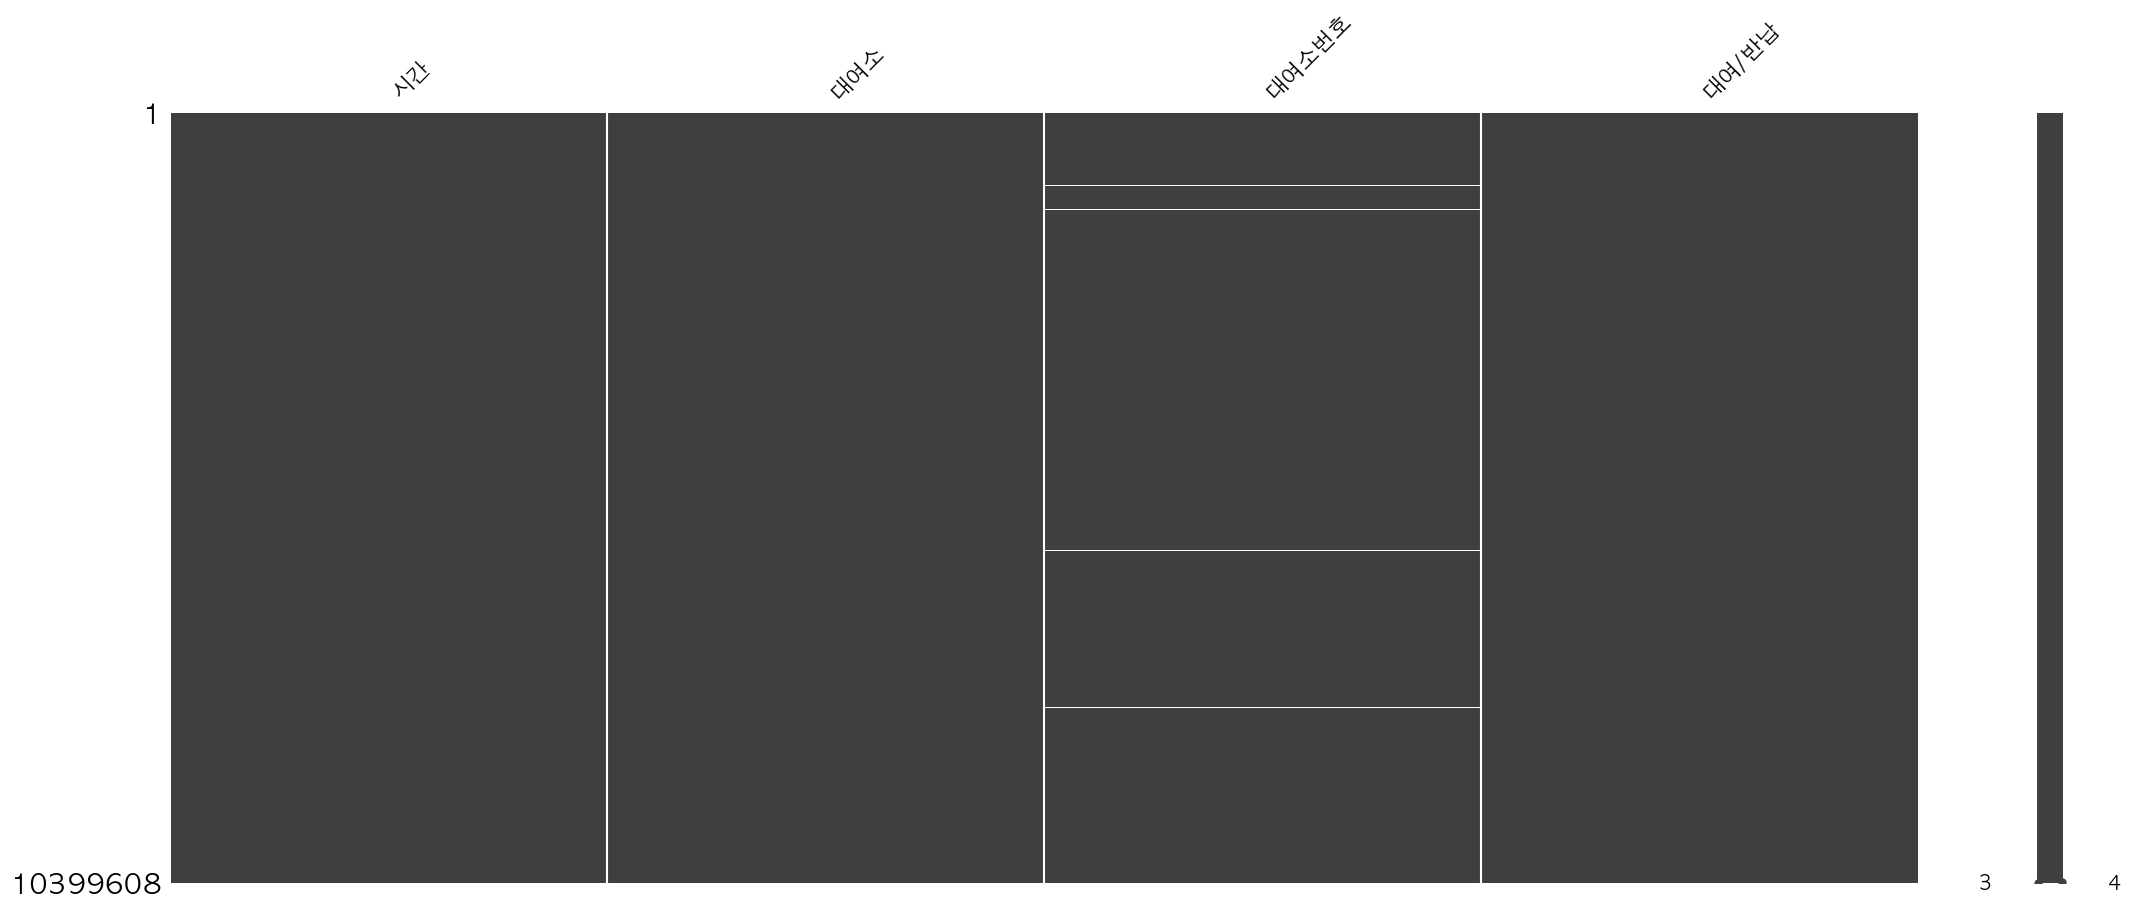

In [111]:
import missingno as msno

msno.matrix(time_based_data)

> 6월 데이터가 전부 NaN값으로 들어가 있다.  
우리가 사용하려는 데이터는 2023 05~ 2024 05 이므로 6월 데이터는 삭제

In [112]:
# '시간' 컬럼을 datetime 형식으로 변환
time_based_data['시간'] = pd.to_datetime(time_based_data['시간'])

# 연, 월, 일 추출
time_based_data['연'] = time_based_data['시간'].dt.year
time_based_data['월'] = time_based_data['시간'].dt.month
time_based_data['일'] = time_based_data['시간'].dt.day

print(time_based_data.head())

                         시간                      대여소   대여소번호 대여/반납     연  월  일
2697498 2023-05-01 00:00:11            잠실 자전거 수리센터 앞  2647.0    대여  2023  5  1
2697502 2023-05-01 00:00:20                   배명고등학교  2631.0    대여  2023  5  1
2697500 2023-05-01 00:00:42                 문정동 근린공원  1265.0    대여  2023  5  1
2697499 2023-05-01 00:00:51             몽촌토성역 1번출구 옆  1268.0    대여  2023  5  1
2697622 2023-05-01 00:00:54  고속터미널역 8-1번, 8-2번 출구 사이  2219.0    대여  2023  5  1


In [113]:
# 2024년 6월에 해당하는 데이터의 인덱스 추출
indices_to_drop = time_based_data[(time_based_data['연'] == 2024) & (time_based_data['월'] == 6)].index

# 해당 인덱스를 drop으로 삭제
time_based_data = time_based_data.drop(indices_to_drop)

# 결과 확인
time_based_data

,시간,대여소,대여소번호,대여/반납,연,월,일
2697498,2023-05-01 00:00:11,잠실 자전거 수리센터 앞,2647.0,대여,2023,5,1
2697502,2023-05-01 00:00:20,배명고등학교,2631.0,대여,2023,5,1
2697500,2023-05-01 00:00:42,문정동 근린공원,1265.0,대여,2023,5,1
2697499,2023-05-01 00:00:51,몽촌토성역 1번출구 옆,1268.0,대여,2023,5,1
2697622,2023-05-01 00:00:54,"고속터미널역 8-1번, 8-2번 출구 사이",2219.0,대여,2023,5,1
...,...,...,...,...,...,...,...
6260458,2024-05-31 23:59:43,송파소방서 맞은편(성내4교),1282.0,반납,2024,5,31
1060684,2024-05-31 23:59:45,서울복합물류 게이트 1,4852.0,대여,2024,5,31
1060719,2024-05-31 23:59:51,가락시장역 2번 출구,4854.0,대여,2024,5,31
1060750,2024-05-31 23:59:54,삼성SDS,4452.0,대여,2024,5,31


#### 휴일 정보 추가

In [114]:
import pandas as pd
import holidays

# 대한민국 공휴일 설정
kr_holidays = holidays.KR()

# '시간' 컬럼을 datetime 형식으로 변환 (이미 datetime 형식이라면 생략 가능)
time_based_data['시간'] = pd.to_datetime(time_based_data['시간'])

# '날짜' 컬럼 추가 (시간에서 날짜만 추출)
time_based_data['날짜'] = time_based_data['시간'].dt.date

# '요일' 추가 (0=월요일, ..., 6=일요일)
time_based_data['요일'] = time_based_data['시간'].dt.weekday

# '휴일여부' 추가 (0=평일, 1=주말, 2=공휴일)
time_based_data['휴일여부'] = time_based_data['날짜'].apply(
    lambda x: 2 if x in kr_holidays else (1 if pd.Timestamp(x).weekday() >= 5 else 0)
)

# 결과 확인
print(time_based_data[['시간', '날짜', '요일', '휴일여부']].head())

                         시간          날짜  요일  휴일여부
2697498 2023-05-01 00:00:11  2023-05-01   0     0
2697502 2023-05-01 00:00:20  2023-05-01   0     0
2697500 2023-05-01 00:00:42  2023-05-01   0     0
2697499 2023-05-01 00:00:51  2023-05-01   0     0
2697622 2023-05-01 00:00:54  2023-05-01   0     0


#### 결측치 처리

In [115]:
# '대여소' 열에서 '\N' 값 확인
print(time_based_data[time_based_data['대여소'] == r'\N'])

                         시간 대여소  대여소번호 대여/반납     연  월   일          날짜  요일  \
7897722 2023-05-01 02:50:31  \N    NaN    반납  2023  5   1  2023-05-01   0   
7898035 2023-05-01 06:49:51  \N    NaN    반납  2023  5   1  2023-05-01   0   
7898951 2023-05-01 08:50:32  \N    NaN    반납  2023  5   1  2023-05-01   0   
7899377 2023-05-01 09:28:55  \N    NaN    반납  2023  5   1  2023-05-01   0   
7899513 2023-05-01 09:43:07  \N    NaN    반납  2023  5   1  2023-05-01   0   
...                     ...  ..    ...   ...   ... ..  ..         ...  ..   
6259208 2024-05-31 22:30:44  \N    NaN    반납  2024  5  31  2024-05-31   4   
6259756 2024-05-31 23:04:17  \N    NaN    반납  2024  5  31  2024-05-31   4   
6259770 2024-05-31 23:05:21  \N    NaN    반납  2024  5  31  2024-05-31   4   
6260108 2024-05-31 23:27:59  \N    NaN    반납  2024  5  31  2024-05-31   4   
6260271 2024-05-31 23:40:43  \N    NaN    반납  2024  5  31  2024-05-31   4   

         휴일여부  
7897722     0  
7898035     0  
7898951     0  
7899377    

In [116]:
import numpy as np

# '\N' 값을 NaN으로 변환
time_based_data['대여소'] = time_based_data['대여소'].replace(r'\N', np.nan)

> 2023 05월이 전부 NaN값이므로 2023 06~ 2024 05월 까지 12개월로 수정

In [117]:
# 2024년 6월에 해당하는 데이터의 인덱스 추출
indices_to_drop = time_based_data[(time_based_data['연'] == 2023) & (time_based_data['월'] == 5)].index

# 해당 인덱스를 drop으로 삭제
time_based_data = time_based_data.drop(indices_to_drop)

# 결과 확인
time_based_data

,시간,대여소,대여소번호,대여/반납,연,월,일,날짜,요일,휴일여부
3626289,2023-06-01 00:00:01,송파나루역 4번 출구옆,2620.0,대여,2023,6,1,2023-06-01,3,0
8434855,2023-06-01 00:00:09,문정시영아파트 5동 앞 공원,2627.0,반납,2023,6,1,2023-06-01,3,0
3626268,2023-06-01 00:00:10,석촌고분역 2번 출구,2632.0,대여,2023,6,1,2023-06-01,3,0
3626267,2023-06-01 00:00:15,배명고등학교 건너편,4886.0,대여,2023,6,1,2023-06-01,3,0
3626345,2023-06-01 00:00:18,LIGA 아파트 앞,1011.0,대여,2023,6,1,2023-06-01,3,0
...,...,...,...,...,...,...,...,...,...,...
6260458,2024-05-31 23:59:43,송파소방서 맞은편(성내4교),1282.0,반납,2024,5,31,2024-05-31,4,0
1060684,2024-05-31 23:59:45,서울복합물류 게이트 1,4852.0,대여,2024,5,31,2024-05-31,4,0
1060719,2024-05-31 23:59:51,가락시장역 2번 출구,4854.0,대여,2024,5,31,2024-05-31,4,0
1060750,2024-05-31 23:59:54,삼성SDS,4452.0,대여,2024,5,31,2024-05-31,4,0


In [118]:
time_based_data = time_based_data.dropna(subset=['대여소','대여소번호'])  # NaN 값이 있는 행 삭제

<Axes: >

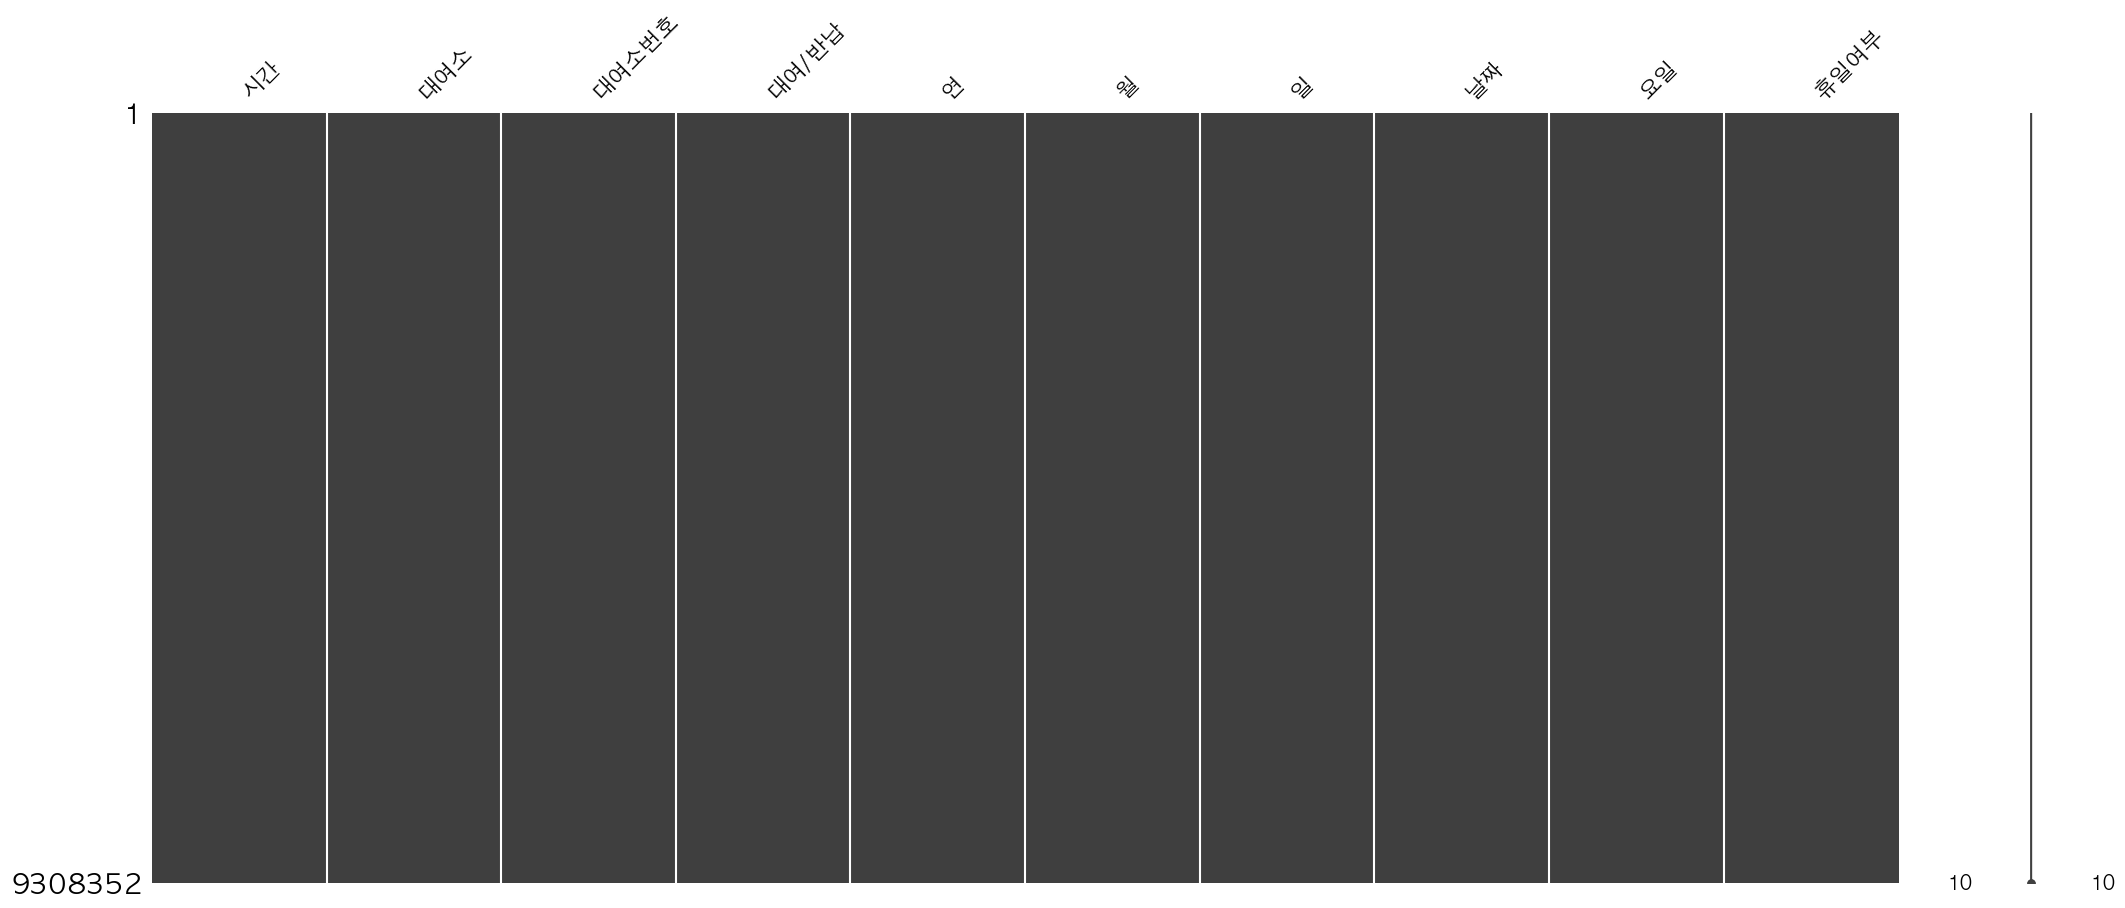

In [119]:
msno.matrix(time_based_data)

> 데이터가 약 1000만개이므로 NaN값 삭제

In [120]:
time_based_data['대여소번호'].astype('int')

3626289    2620
8434855    2627
3626268    2632
3626267    4886
3626345    1011
           ... 
6260458    1282
1060684    4852
1060719    4854
1060750    4452
1060722    1274
Name: 대여소번호, Length: 9308352, dtype: int64

> 대여소 번호가 float type이므로 int type으로 변경

#### 송파구 대여소 추출

In [121]:
all_stations = time_based_data['대여소번호'].unique()

# 결과 출력
for station in all_stations:
    print(station)

2620.0
2627.0
2632.0
4886.0
1011.0
2637.0
1285.0
1010.0
4864.0
2623.0
4462.0
2315.0
1221.0
4867.0
2603.0
1028.0
2625.0
3611.0
2604.0
5752.0
1218.0
4876.0
4868.0
4486.0
2633.0
5774.0
2384.0
2628.0
4888.0
3627.0
1244.0
1274.0
1248.0
1209.0
1208.0
1201.0
2262.0
4891.0
4496.0
2601.0
1293.0
4873.0
1228.0
1264.0
2644.0
4499.0
1204.0
2615.0
4453.0
2539.0
5760.0
1220.0
2657.0
2635.0
1286.0
1268.0
1212.0
2653.0
2606.0
2613.0
1235.0
2412.0
2508.0
2619.0
4484.0
1259.0
1297.0
516.0
2611.0
1263.0
4895.0
544.0
3664.0
3681.0
1265.0
1289.0
2646.0
1262.0
1051.0
1207.0
2643.0
4460.0
2382.0
1050.0
1257.0
515.0
1232.0
4456.0
2608.0
1017.0
4454.0
5768.0
4464.0
1019.0
1227.0
4875.0
2630.0
4865.0
2642.0
1217.0
1015.0
2622.0
4874.0
4884.0
4461.0
4870.0
4491.0
2658.0
4859.0
1267.0
4897.0
5770.0
1241.0
2647.0
3501.0
5756.0
2641.0
1258.0
4862.0
4463.0
4468.0
5761.0
1029.0
2654.0
2648.0
2652.0
1269.0
1282.0
4889.0
4474.0
2605.0
4465.0
4493.0
2375.0
1275.0
4893.0
4880.0
4872.0
4457.0
2651.0
1122.0
1080.0
1288.0
35

> 현재 데이터가 송파구 제외하고도 있으므로 대여, 반납을 송파구만 추출

In [122]:
import pandas as pd

# 송파구 대여소 번호 리스트
songpa_station_ids = [
    1201, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1212, 1213, 1214, 
    1215, 1217, 1218, 1220, 1221, 1222, 1224, 1226, 1227, 1228, 1229, 1230, 
    1231, 1232, 1233, 1235, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 
    1247, 1248, 1250, 1251, 1253, 1256, 1257, 1258, 1259, 1260, 1262, 1263, 
    1264, 1265, 1266, 1267, 1268, 1269, 1271, 1274, 1275, 1277, 1278, 1279, 
    1280, 1282, 1283, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1293, 1295, 
    1296, 1297, 1299, 1300, 2601, 2603, 2604, 2605, 2606, 2608, 2609, 2611, 
    2612, 2613, 2614, 2615, 2616, 2617, 2618, 2619, 2620, 2621, 2622, 2623, 
    2625, 2626, 2627, 2628, 2630, 2631, 2632, 2633, 2634, 2635, 2637, 2639, 
    2641, 2642, 2643, 2644, 2645, 2646, 2647, 2648, 2649, 2650, 2651, 2652, 
    2653, 2654, 2655, 2656, 2657, 2658, 2659, 4452, 4453, 4454, 4456, 4457, 
    4458, 4460, 4461, 4462, 4463, 4464, 4465, 4468, 4469, 4472, 4473, 4474, 
    4475, 4478, 4479, 4480, 4481, 4483, 4484, 4485, 4486, 4488, 4490, 4491, 
    4493, 4496, 4497, 4499, 4852, 4854, 4855, 4856, 4857, 4859, 4860, 4862, 
    4863, 4864, 4865, 4867, 4868, 4870, 4871, 4872, 4873, 4874, 4875, 4879, 
    4880, 4881, 4882, 4883, 4884, 4885, 4886, 4887, 4888, 4889, 4891, 4892, 
    4893, 4895, 4896, 4897, 5751, 5752, 5753, 5756, 5758, 5759, 5760, 5761, 
    5763, 5764, 5765, 5766, 5767, 5768, 5773, 5774, 5775, 5777, 5778
]

# '대여소번호'를 int로 변환
time_based_data['대여소번호'] = time_based_data['대여소번호'].astype(int)

# 송파구 대여소 번호에 해당하는 데이터 필터링
filtered_data = time_based_data[time_based_data['대여소번호'].isin(songpa_station_ids)]

# 필터링된 데이터 확인
print(filtered_data)

                         시간              대여소  대여소번호 대여/반납     연  월   일  \
3626289 2023-06-01 00:00:01     송파나루역 4번 출구옆   2620    대여  2023  6   1   
8434855 2023-06-01 00:00:09  문정시영아파트 5동 앞 공원   2627    반납  2023  6   1   
3626268 2023-06-01 00:00:10      석촌고분역 2번 출구   2632    대여  2023  6   1   
3626267 2023-06-01 00:00:15       배명고등학교 건너편   4886    대여  2023  6   1   
8434856 2023-06-01 00:00:20   아시아지하보도 14번 출구   2637    반납  2023  6   1   
...                     ...              ...    ...   ...   ... ..  ..   
6260458 2024-05-31 23:59:43  송파소방서 맞은편(성내4교)   1282    반납  2024  5  31   
1060684 2024-05-31 23:59:45     서울복합물류 게이트 1   4852    대여  2024  5  31   
1060719 2024-05-31 23:59:51      가락시장역 2번 출구   4854    대여  2024  5  31   
1060750 2024-05-31 23:59:54            삼성SDS   4452    대여  2024  5  31   
1060722 2024-05-31 23:59:57           영파여고 앞   1274    대여  2024  5  31   

                 날짜  요일  휴일여부  
3626289  2023-06-01   3     0  
8434855  2023-06-01   3     0  
3626268  2023-0

In [123]:
# 시간대별로 묶고 월별, 대여소별로 대여 및 반납 집계
filtered_data['시간대'] = pd.to_datetime(filtered_data['시간']).dt.hour

# 대여소별로 대여/반납 수를 월별로 집계
grouped_data = (
    filtered_data
    .groupby(['대여소번호', '대여소', '연', '월', '시간대', '대여/반납'], as_index=False)
    .size()
    .rename(columns={'size': '대수'})
)

# 대여와 반납을 한 데이터프레임에 정렬
pivot_data = grouped_data.pivot_table(
    index=['대여소번호', '대여소', '연', '월', '시간대'], 
    columns='대여/반납', 
    values='대수', 
    fill_value=0
).reset_index()

# 최종 데이터프레임
pivot_data.columns.name = None  # 열 이름 중첩 방지
pivot_data.rename(columns={'대여': '대여대수', '반납': '반납대수'}, inplace=True)

# 결과 확인
print(pivot_data)

       대여소번호          대여소     연  월  시간대   대여대수   반납대수
0       1201  가락시장역 3번 출구  2023  6    0  105.0  127.0
1       1201  가락시장역 3번 출구  2023  6    1  102.0  178.0
2       1201  가락시장역 3번 출구  2023  6    2   93.0  132.0
3       1201  가락시장역 3번 출구  2023  6    3   75.0  102.0
4       1201  가락시장역 3번 출구  2023  6    4   49.0   47.0
...      ...          ...   ... ..  ...    ...    ...
61029   5778         북위례3  2024  5   19   31.0   42.0
61030   5778         북위례3  2024  5   20   21.0   25.0
61031   5778         북위례3  2024  5   21   30.0   12.0
61032   5778         북위례3  2024  5   22   21.0   27.0
61033   5778         북위례3  2024  5   23   27.0   18.0

[61034 rows x 7 columns]


In [124]:
# 1. pivot_data를 '대여소'로 그룹화
grouped_data = pivot_data.groupby('대여소', as_index=False)

# 2. 각 '대여소'에서 '대여대수' 기준으로 내림차순 정렬
sorted_data = grouped_data.apply(
    lambda group: group.sort_values(by='대여대수', ascending=False)
)

# 3. 결과 확인
sorted_data

대여소번호             대여소     연  월  시간대   대여대수   반납대수
0   1408    1206  9호선종합운동장역 9번출구  2024  4   17  258.0  171.0
    1433    1206  9호선종합운동장역 9번출구  2024  5   18  257.0  206.0
    1170    1206  9호선종합운동장역 9번출구  2023  6   18  242.0  202.0
    1409    1206  9호선종합운동장역 9번출구  2024  4   18  210.0  224.0
    1432    1206  9호선종합운동장역 9번출구  2024  5   17  198.0  142.0
...          ...             ...   ... ..  ...    ...    ...
220 43394   4486        홈플러스 잠실점  2024  2    3    1.0    0.0
    43420   4486        홈플러스 잠실점  2024  3    5    1.0   27.0
    43372   4486        홈플러스 잠실점  2024  1    5    0.0    4.0
    43373   4486        홈플러스 잠실점  2024  1    6    0.0   64.0
    43396   4486        홈플러스 잠실점  2024  2    5    0.0   13.0

[61034 rows x 7 columns]

In [125]:
# 최다 대여 대수 기준으로 상위 5개 대여소 선택
top_5_stations = (
    sorted_data.groupby('대여소')['대여대수'].sum()
    .nlargest(5)
    .index
)

# 상위 5개 대여소 데이터 필터링
top_5_data = sorted_data[sorted_data['대여소'].isin(top_5_stations)]
top_5_data

대여소번호                대여소     연   월  시간대    대여대수    반납대수
35  2585    1210  롯데월드타워(잠실역2번출구 쪽)  2024   5   18  2568.0  1390.0
    2561    1210  롯데월드타워(잠실역2번출구 쪽)  2024   4   18  2264.0  1295.0
    2417    1210  롯데월드타워(잠실역2번출구 쪽)  2023  10   18  2252.0  1473.0
    2321    1210  롯데월드타워(잠실역2번출구 쪽)  2023   6   18  2184.0  1344.0
    2584    1210  롯데월드타워(잠실역2번출구 쪽)  2024   5   17  1816.0  1145.0
...          ...                ...   ...  ..  ...     ...     ...
158 26972   2622        올림픽공원역 3번출구  2024   1    3     3.0     4.0
    26948   2622        올림픽공원역 3번출구  2023  12    3     2.0     5.0
    27021   2622        올림픽공원역 3번출구  2024   3    4     1.0     5.0
    26949   2622        올림픽공원역 3번출구  2023  12    4     1.0     6.0
    26997   2622        올림픽공원역 3번출구  2024   2    4     0.0     3.0

[1440 rows x 7 columns]

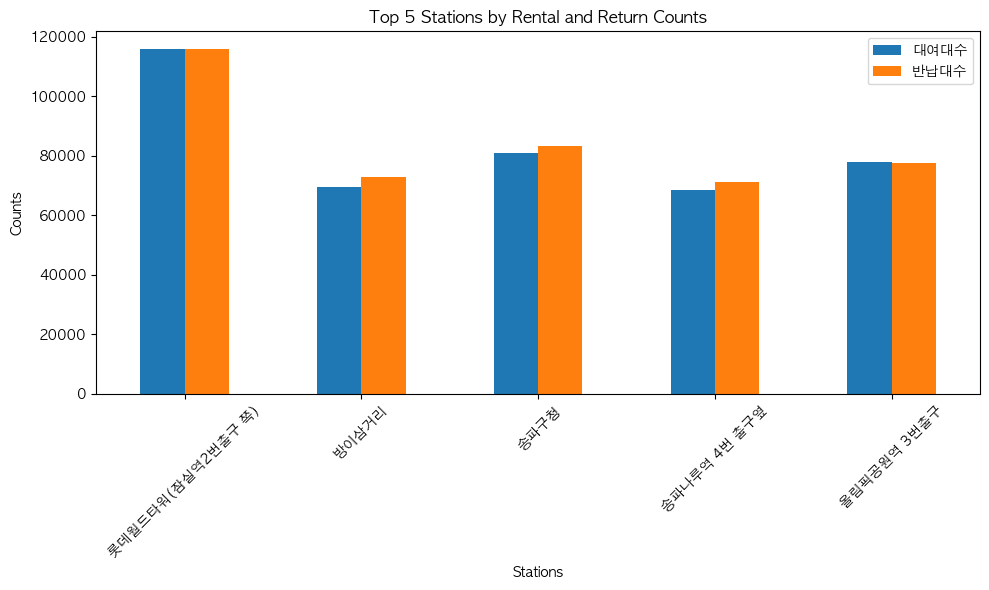

In [126]:
import matplotlib.pyplot as plt

# 상위 5개 대여소 선택 (대여대수 합계 기준)
top_5_stations = (
    pivot_data.groupby('대여소')['대여대수'].sum()
    .nlargest(5)
    .index
)

# 상위 5개 대여소 데이터 필터링
top_5_data = pivot_data[pivot_data['대여소'].isin(top_5_stations)]

# 대여소별로 대여대수와 반납대수 합계 계산
top_5_summary = top_5_data.groupby('대여소')[['대여대수', '반납대수']].sum()

# 그래프 그리기
top_5_summary.plot(kind='bar', figsize=(10, 6))
plt.title('Top 5 Stations by Rental and Return Counts')
plt.xlabel('Stations')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [127]:
# 데이터 저장 
pivot_data.to_csv("../../data/대여_반납대수.csv")

---
## 원본 데이터 병합 

#### 대여소의 역할
- 대여소는 대여소 번호와 이름으로 구분되며, 대여도 이루어지고 반납도 이루어지는 장소.
- 따라서 대여소를 기준으로:
    - 대여대수 : 해당 대여소에서 따릉이를 빌려간 횟수.
    - 반납대수 : 해당 대여소에서 자전거를 반납한 횟수.

#### 대소 대여대수와 반납소 대여대수의 차이
- 대여소 대여대수:
    - 특정 시간대에 대여소에서 반납이 이루어진 횟수.
    - 대여 대여소번호를 기준으로 계산.
- 반납소 대여대수:
    - 특정 시간대에 대여소에서 반납이 이루어진 횟수.
    - 반납 대여소번호를 기준으로 계산.
**즉, 동일한 대여소라도 대여와 반납의 활등은 분리된 데이터로 구분.**

### 나눠야 하는 이유?
#### 대여소에서 이루어지는 활동(대여와 반납)은 각각의 흐름과 혼잡도를 추출하는데 중요한 정보 제공.
1. 대여 활동만 많은 대여소:
    - 특정 시간대에 자전거가 자주 빌려가는 대여소라면 자전거 부족 문제가 발생.
2. 반납 활동만 많은 대여소:
    - 특정 시간대에 자전거가 자주 반납되는 대여소라면 자전거 과잉문제가 발생할 수 있음.
3. 대여와 반납이 균형적인 대여소:
    - 자전거 배치가 원활히 이루어지는 상황

In [128]:
# 원본 데이터
df

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID,자전거구분,자치구,반납 자치구
0,SPB-62435,2024-04-01 00:02:22,2637,아시아지하보도 14번 출구,0,2024-04-01 00:02:35,2637.0,아시아지하보도 14번 출구,0,0,0.00,1974,\N,내국인,ST-1864,ST-1864,일반자전거,송파구,송파구
1,SPB-58734,2024-04-01 00:03:25,1295,잠실역 8번출구,0,2024-04-01 00:05:04,4486.0,홈플러스 잠실점,0,1,0.00,2004,M,내국인,ST-1584,ST-2596,일반자전거,송파구,송파구
2,SPB-43679,2024-04-01 00:01:12,4880,송파청소년센터,0,2024-04-01 00:05:08,4893.0,문정법조단지12,0,3,471.33,1997,M,내국인,ST-2957,ST-2972,일반자전거,송파구,송파구
3,SPB-31592,2024-04-01 00:05:20,2621,한성백제역 2번 출구,0,2024-04-01 00:05:30,2621.0,한성백제역 2번 출구,0,0,0.10,2003,M,내국인,ST-1719,ST-1719,일반자전거,송파구,송파구
4,SPB-69307,2024-04-01 00:00:53,4465,건영아파트앞 사거리,0,2024-04-01 00:09:05,4490.0,송파파인타운 10단지 1005동,0,8,1062.41,2000,NaN,내국인,ST-2581,ST-2598,일반자전거,송파구,송파구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5199799,SPB-31629,2023-09-30 23:54:41,1297,석촌호수교차로(동호 팔각정 앞),0,2023-10-01 01:51:37,1290.0,위례송파꿈에그린아파트24단지 앞 성벽 다리 밑,0,116,7865.45,1999,M,내국인,ST-1586,ST-1579,일반자전거,송파구,송파구
5199800,SPB-59100,2023-09-30 23:54:43,4886,배명고등학교 건너편,0,2023-10-01 02:11:43,4886.0,배명고등학교 건너편,0,137,19540.00,1992,\N,내국인,ST-2986,ST-2986,일반자전거,송파구,송파구
5199801,SPB-36304,2023-09-30 17:29:12,1259,방이역 1번출구,0,2023-10-01 06:08:30,1204.0,거여역 3번출구,0,759,8160.87,2008,M,내국인,ST-1078,ST-930,일반자전거,송파구,송파구
5199802,SPB-44686,2023-09-30 22:55:01,1278,송파구청 교차로,0,2023-10-01 08:14:07,4859.0,잠실나루 나들목,0,559,11456.41,1967,\N,내국인,ST-1409,ST-2609,일반자전거,송파구,송파구


In [129]:
# 보조 데이터 
pivot_data

,대여소번호,대여소,연,월,시간대,대여대수,반납대수
0,1201,가락시장역 3번 출구,2023,6,0,105.0,127.0
1,1201,가락시장역 3번 출구,2023,6,1,102.0,178.0
2,1201,가락시장역 3번 출구,2023,6,2,93.0,132.0
3,1201,가락시장역 3번 출구,2023,6,3,75.0,102.0
4,1201,가락시장역 3번 출구,2023,6,4,49.0,47.0
...,...,...,...,...,...,...,...
61029,5778,북위례3,2024,5,19,31.0,42.0
61030,5778,북위례3,2024,5,20,21.0,25.0
61031,5778,북위례3,2024,5,21,30.0,12.0
61032,5778,북위례3,2024,5,22,21.0,27.0
